## Price Predictor For Real Estates Companies

In [1]:
import pandas as pd

In [2]:
h_info = pd.read_csv("data1.csv")
h_info.head() #checking frame head meant five entries.
# • crim: Per capita crime rate by town.
# • zn: Proportion of large residential lots (over 25,000 sq. ft.).
# • indus: Proportion of non-retail business acres per town.
# • chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
# • nox: Concentration of nitrogen oxides in the air.
# • rm: Average number of rooms per dwelling.
# • age: Proportion of old owner-occupied units built before 1940.
# • dis: Weighted distances to Boston employment centers.
# • rad: Index of accessibility to radial highways.
# • tax: Property tax rate per $10,000.
# • ptratio: pupil-teacher ratio by town.
# • b: proportion of owner-occupied units built prior to 1940 or 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# • lstat:%lower status of the population.
# • medv:median value of owner-occupied homes in $1000’s

#checking if there is a missing data or not.

#h_info.info()

#checking specific feature information i.e value count 

h_info["b"].value_counts() #see if there unexpected thing or csv read problem

#checks if there is blank or not.the STD min 
h_info.describe() #yes there is 5 blank in rm --- ckeck count row 


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
# see graphs here 
import matplotlib.pyplot as plt
#want to see graph here 
%matplotlib inline 

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

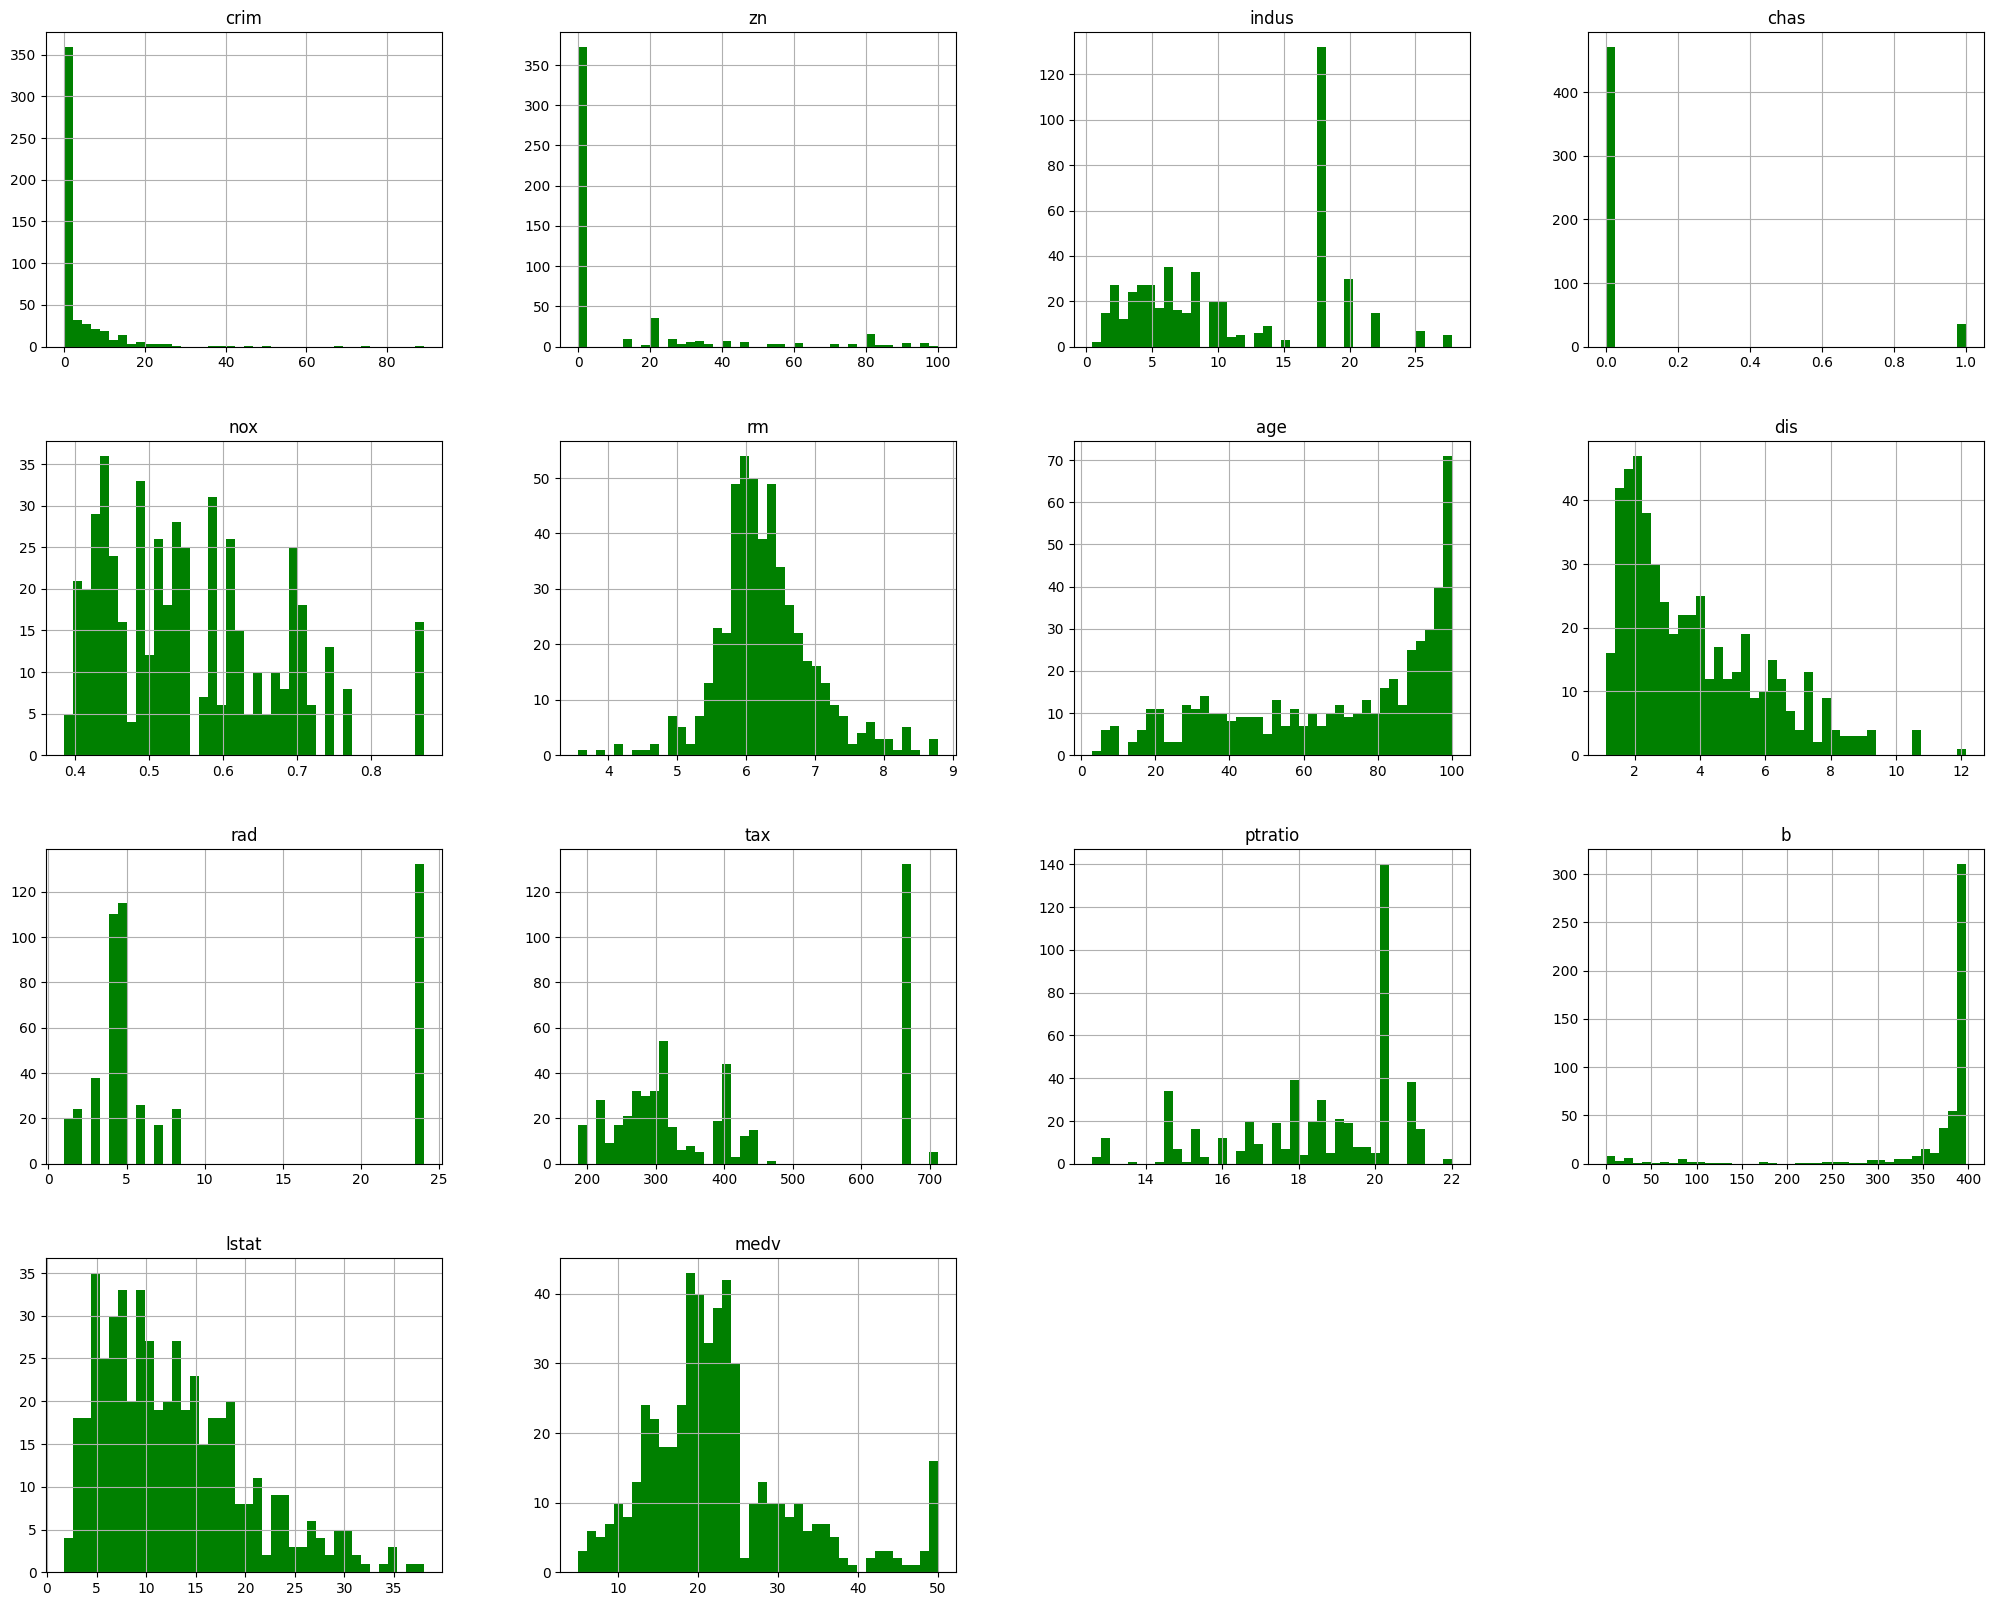

In [4]:
#Lets see histogram of my feasture
h_info.hist(bins=40, figsize = (25,20), color = 'g')
#i.e there are 200(x-axis) house such that they have 70(y-axis) age 

## Data Spliting 

## Method_1 : Manual

In [5]:
#Here I am split data for trainig and testing
import numpy as np

def train_test(data,test_ratio):
    np.random.seed(42)
    shuffle=np.random.permutation(len(data)) #Randomly permute indices of data
    #There  is the problem in shuffling with that method if i am run it again and again then 
    #test set samples comes in training and training comes in test my model see all samples then case of overfiting.
    #Solution: is shuffle above line we can set any value no necessarly 42.
    test_set_size=int(len(data) * test_ratio)
    test_set_indices=shuffle[:test_set_size]
    train_set_indices=shuffle[test_set_size:]
    return data.iloc[train_set_indices], data.iloc[test_set_indices]
    
train_set_m,test_set_m = train_test(h_info,0.20) #80% train by 20% test
#checking
# print("train_set_size = ",len(train_set_m))
# print("test_set_size = ",len(test_set_m))
#test_set_m.head()

## Method_2 : Direct_From_Sklearn (Recommonded)

In [6]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(h_info,test_size=0.20,random_state=42)
#checking
# print("train_set_size = ",len(train_set))
# print("test_set_size = ",len(test_set))
# test_set.head()

#Now here is the one problem thats I encounter in m data set a binary feature exist 'chas' which is 0 or 1
#What happen if all O come in training and all 1 in testing obviously bad prediction.
#Solution: Using Straitified Shuffling Calss : To perform equall distribution of one or more senstive variables in test and train set.
#chas in sensitive here
from sklearn.model_selection  import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size =0.20,random_state=42)
for train_index,test_index in split.split(h_info,h_info['chas']):
    strat_train_set = h_info.loc[train_index]
    strat_test_set = h_info.loc[test_index]
#checking
# strat_test_set['chas'].value_counts()
# strat_train_set['chas'].value_counts()
#strat_test_set.head()

##Result:successfuly equally distribute

In [7]:
#I am add this cell when I am use Imputer remianing reason write there.
#Privoiusly I am skip this because data is small to understand below analysis so..
h_info= strat_train_set.copy()

## Correlations Check

<Axes: xlabel='rm', ylabel='medv'>

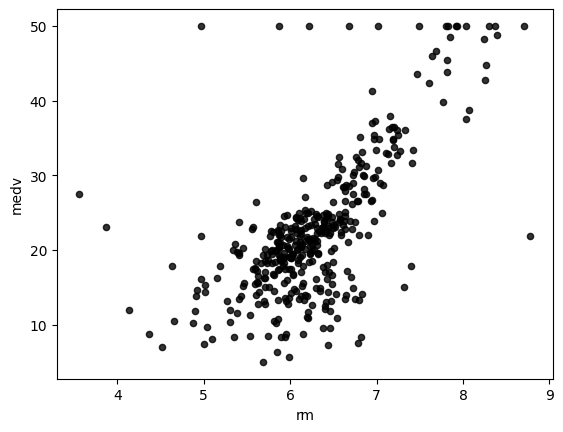

In [8]:
corr_matrix = h_info.corr() #Making correlation Matrix of data
corr_matrix['medv'].sort_values(ascending=False)
#its show 'medv' linear relation with each variable +ve meant one increase other increase and -ve meant one increase other decrease here 'rm' is strong postive corelate.
#Now seeing Corletion Plots
from pandas.plotting import scatter_matrix

#14 x 14 =196 graph here i shortlists and plot some.

#attributes = ["medv","rm","lstat"] #strong +ve and strong -ve corr.
#scatter_matrix(h_info[attributes],figsize = (14,10),color='y')

#big_picture
h_info.plot(kind="scatter",x="rm",y="medv",alpha=0.8,color='black')

## Trying New Feature By Combining Available For Tuning Outliers 

<Axes: xlabel='taxrm', ylabel='medv'>

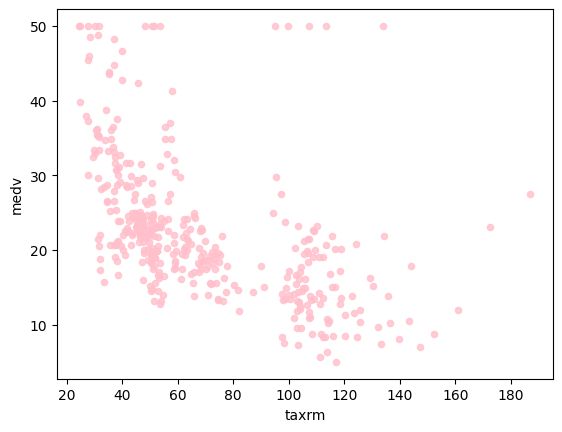

In [9]:
h_info["taxrm"] = h_info["tax"]/h_info["rm"] # Combines varaible that have more outliers with others. 
#Checking and Analysis
corr_matrix = h_info.corr()
corr_matrix['medv'].sort_values(ascending=False)
h_info.plot(kind="scatter",x="taxrm",y="medv",alpha=0.8,color='pink') # Outlier Reduce

In [10]:
#This is add by me when I select models
h_info = strat_train_set.drop(["medv"],axis=1)
h_info_labels = strat_train_set["medv"].copy()

## Fixing Missing Data Point / Instances In Specific Attributes

In [11]:
#To take care of missing attributes, here are three options:
# 1.Get rid of the missing data points
# 2.Get rid of the whole attribute
# 3.Set the value to some value(0,mean or median)

copy=h_info.dropna(subset=["rm"]).shape #option1
copy
#Note that the original housing dataframe will remain unchanged

(399, 13)

In [12]:
h_info.drop("rm",axis=1).shape #option2
#Note that there is no rm column and also note that the original housing dataframe will remain unchanged

(404, 12)

In [13]:
median = h_info["rm"].median() # Compute median for option 3
h_info["rm"].fillna(median) #Option3
# Note that the original housing dataframe will remain unchanged
h_info.describe()  #before we started filling missing attributes

#Now to fill actually I am use Imputer class from sklearn
#Before this I am going to change h_info just cell above 'Correlation Analysis' to make training data only. Reason writing there.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median") #Compute median of all coloums i.e varaibles and maked array
imputer.fit(h_info) #Fitting this strategy on given data
imputer.statistics_ #check array which is an row 
X = imputer.transform(h_info) # Make array colom
#Now Fill Nan Atributes Samples By Median
h_info_tr = pd.DataFrame(X,columns=h_info.columns)
h_info_tr.describe() #After This Check Count.There is no missing value now

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-Learn Design

Primarily, three types of objects

1.
Estimato: - It estimates some parameter based on a dataset. Eg. imputer  t has a fit method and transfrom meth f
Fit met f- Fits the dataset  nd calculates internal paramete.

2. Transform:s - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transfo.

3. Predict:s - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling(Normalization)
   (value - min) / (max - min)
   sklearn provides a class called MinMaxScaler for this.
  
2. Standardization 
   (value - mean) / std
   Sklearn provides a class called Standard Scaler for this.

## Making Pipline

In [14]:
#Just for the Purpose 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline  = Pipeline([
    ('imputer',SimpleImputer(strategy="median")), #We already do it manually
    #     ....add as many as you want in your pipeline
    ('std_scaler',StandardScaler()),]) #Feature Scaling should be perform  at end it use his own transform_fit function

h_info_num_tr = my_pipeline.fit_transform(h_info) #Finally Make arrays for next work where there must be arrays
h_info_num_tr.shape

(404, 13)

## Selecting Desired Models

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(h_info_num_tr,h_info_labels)

RandomForestRegressor()

In [16]:
#Lets Take a Quick Look
some_data = h_info.iloc[:5]
some_labels = h_info_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.463, 25.471, 16.331, 23.488, 23.459])

In [17]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating The Model

In [19]:
from sklearn.metrics import mean_squared_error
h_info_predictions = model.predict(h_info_num_tr)
mse = mean_squared_error(h_info_labels, h_info_predictions)
rmse = np.sqrt(mse)
rmse

1.1634295517057218

## Cross Validation Check

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, h_info_num_tr, h_info_labels, scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([2.77806021, 2.72924632, 4.37720047, 2.53091732, 3.3315517 ,
       2.6303775 , 4.76386489, 3.33641865, 3.34755642, 3.19442273])

In [21]:
def print_scores(scores):
    print("scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
print_scores(rmse_scores)    

scores: [2.77806021 2.72924632 4.37720047 2.53091732 3.3315517  2.6303775
 4.76386489 3.33641865 3.34755642 3.19442273]
Mean: 3.301961620269954
Standard deviation: 0.7040608050208857


## Saving Model

In [23]:
from joblib import dump, load
dump(model, 'CEP.joblib')

['CEP.joblib']

## Testing Model

In [24]:
X_test = strat_test_set.drop("medv",axis=1)
Y_test = strat_test_set["medv"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions,list(Y_test))
final_rmse

2.913198895359115

## Implement Model (Which is Lunched Just Now)

In [25]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [26]:
from joblib import dump, load
import numpy as np
model = load('CEP.joblib')
Feature = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(Feature)

array([22.463])